# Introduction

How much will a house in Kings County sell for? 

In this analysis, I will use data describing the physical properties and location of X homes in Kings County to show predict the price that similar houses will fetch in the real estate market.

## Methodology

### Exploring the data

To understand what we're looking at, I will first explore the data using visualizations to make explicit the relationships between the various characteristics of the homes.

### Describing the data

I will then make observations based on these visualizations and identify which factors are likely to be most predictive of house price.

### Defining the question

This analysis estimates both prediction and inference. What does that mean? I aim to _predict_ the selling price of comparable homes by creating a mathematical model informed by the data. I also aim to _infer_ the "why" behind that price. Thus, my model will answer questions like:

+ Which factors predict the outcome, and how? (e.g., are they positively or negatively correlated with price)
+ Which factors have the greatest impact on price? 
+ Is a particular house over- or under-valued relative to its peers?

### Preparing the data for analysis

I will clean and reformat the data to optimize it for creating a highly predictive and informative model.

### Fitting a model to the data

I use linear regression for this analysis for two reasons. First, it has high predictive value; it can be used to make assumptions about new homes, not just those in the dataset. Second, it is highly interpretable. It is not a "black box" algorithm; rather, a human being can inspect the reasons why I chose the factors I did to create the model. It will be easy to understand the intuitions that explain why any individual factor is predictive of the outcome.

In this section, I will use several different linear regression models to find the best fit. I will also verify their accuracy using statistical methods and visualizations.

# Exploring the Data

First, we'll need to import the data itself and some tools to help us analyze it. Below, I have imported several Python libraries for analyzing and visualizing data and loaded our data set. 

In [26]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn.linear_model as linear_model

import seaborn as sns
sns.set_palette('PuBu_r')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('kc_house_data.csv')

#Set display defaults for pandas
pd.set_option('display.max_rows', 21597)
pd.set_option('display.max_columns', 21)
pd.set_option('display.width', 1000)

#Inspect the first 5 rows of the data to make sure it loaded correctly
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


At a birds'-eye view, we can see that the dataset contains 21,597 entries, each representing a home. Each home is associated with 21 factors or variables (expressed below as columns).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We can see that some data is missing for some of the categories, namely waterfront, view, and yr_renovated. Almost all of the data types are in numerical format, but not all of them make sense. For example, sqft_basement is not expressed numerically, whereas some variables (like waterfront) are numerical, even though they may not be continuous values. (We'll address this later in the analysis.)

In [21]:
print(df.isna().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [22]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


Here, we can see some summary statistics for our homes.

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


I will not be using the date or id columns for analysis, so I will drop them from the DataFrame.

In [3]:
# Clean the data: drop meaningless columns
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


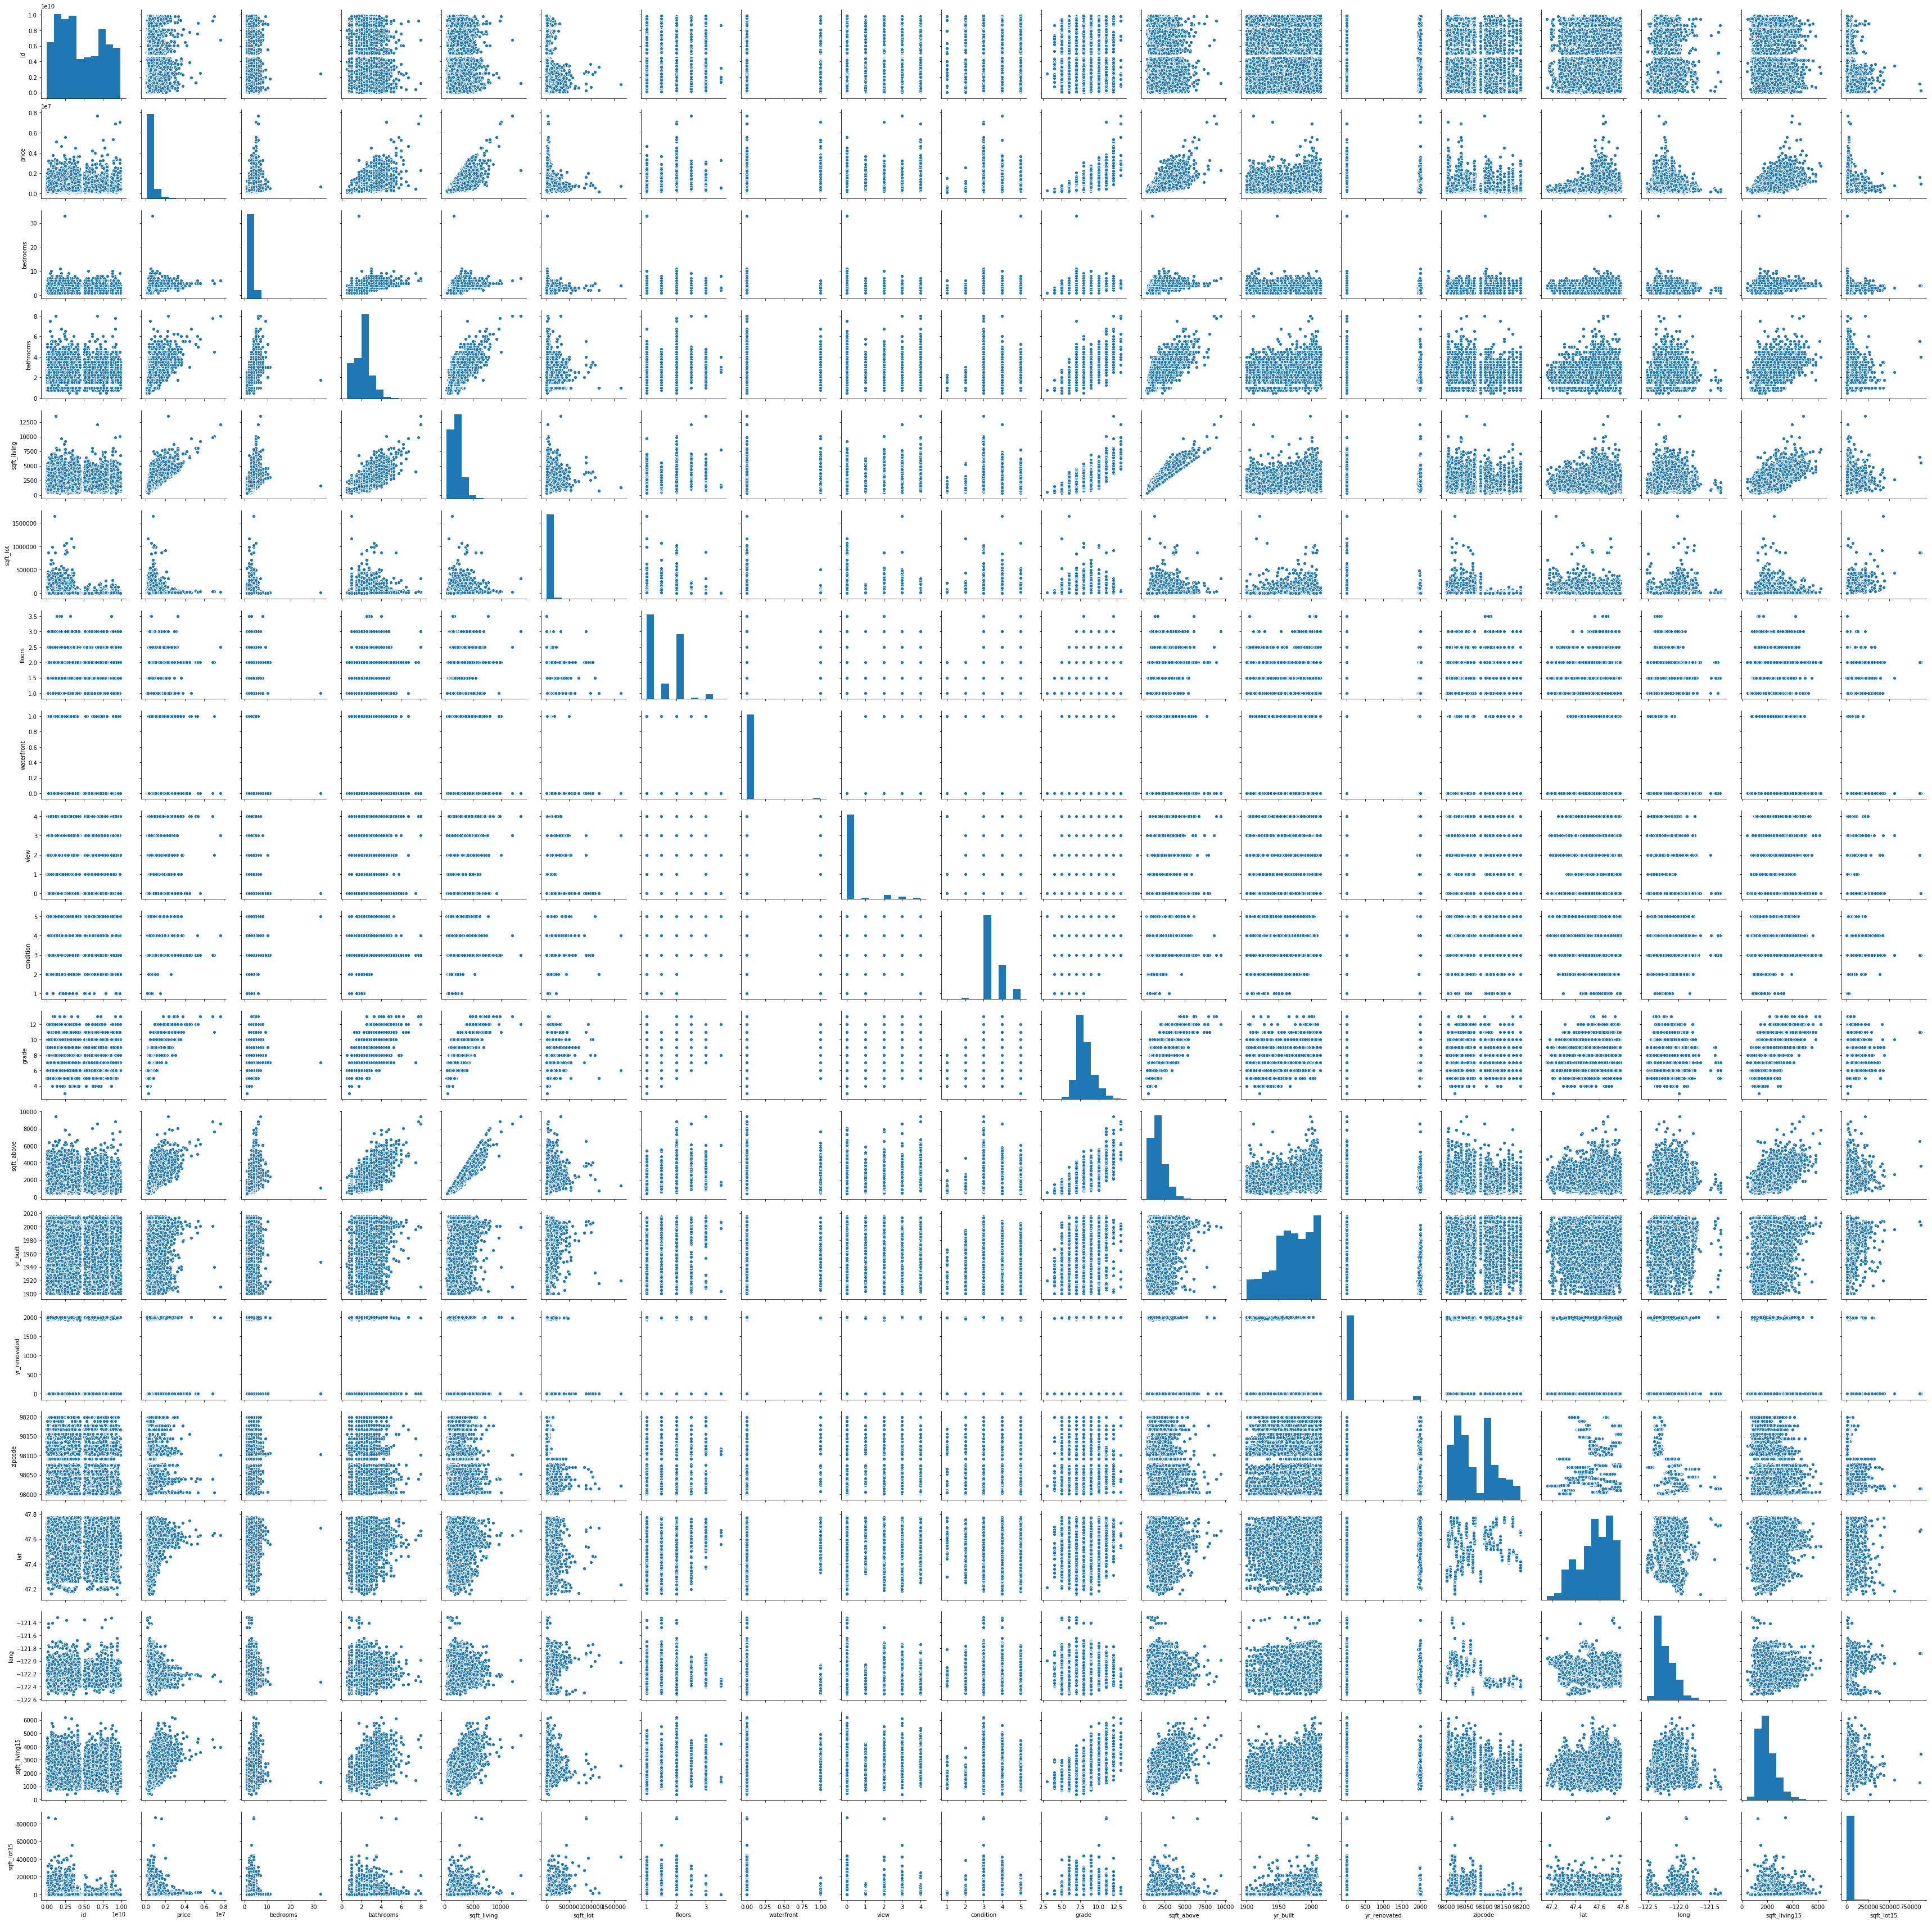

In [20]:
sns.pairplot(data=df);

Let's deal with those missing values. Looking at the data, we see that three columns contain missing values: waterfront, view, and yr_renovated.

In [18]:
# Clean the data: check for nulls and fix them
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The column yr_renovated has a lot of missing values and does not appear to be linearly correlated with price, per the scatterplot above. Therefore, I decided not to use it in the analysis.

In [4]:
#Drop column with nulls
df.drop('yr_renovated', axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


Since there are so few missing observations for the view feature, we can afford to simply drop those rows from the analysis.

In [5]:
#Drop NaNs for view
df.dropna(subset=['view'], inplace=True)
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Since there are only 145 waterfront properties, it's unlikely that we will get a lot of generalisable predictive data out of this variable, so I will eliminate it from the regression analysis as well.|

In [6]:
df.waterfront.value_counts()

0.0    19019
1.0      145
Name: waterfront, dtype: int64

In [7]:
#Drop waterfront
df.drop('waterfront', axis=1, inplace=True)
df.head().isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Next, let's determine which features are most highly correlated with price to decide which ones to include in our regression analysis. From the below correlation matrix, we can see that sqft living (0.7), grade (0.67). sqft_above (0.61), sqft_living15 (0.59), and bathrooms (0.53) are most highly correlated with price.

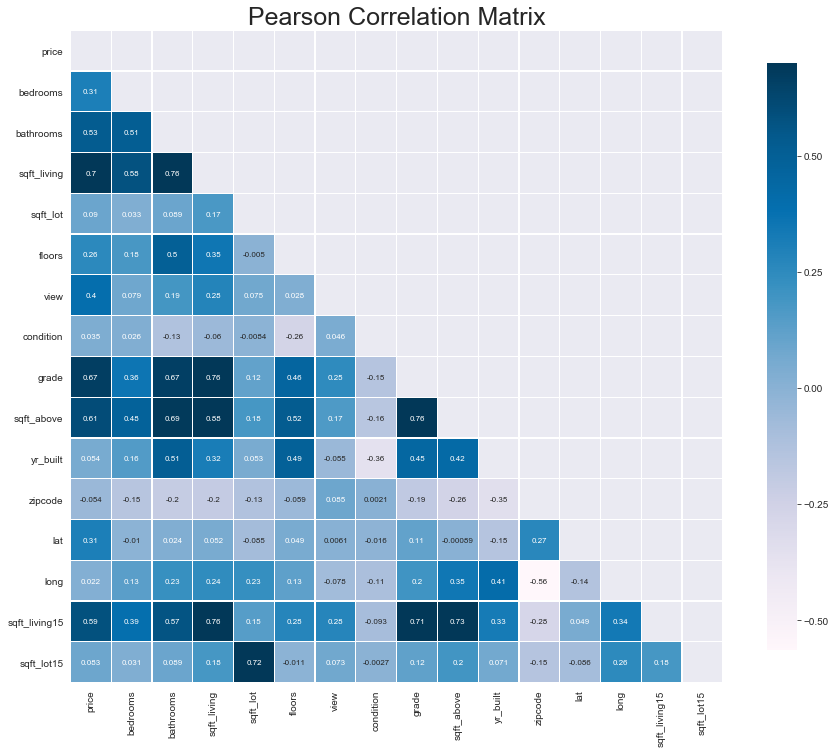

In [28]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'view','condition','grade','sqft_above','sqft_basement','yr_built',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="PuBu", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Now that we've dealt with the null values, we must determine which variables have the highest predictive value and are worth including in our regression analysis. To do so, we must examine them against each other to check for collinearity, since we want to eliminate redundant features.

From the above matrix, we can see that:

+ grade is highly correlated with sqft_living (0.76) and bathrooms (0.67)
+ sqft_above is highly correlated with bathrooms (0.69) and sqft_living (0.88)
+ sqft_living15 is highly correlated with sqft_living (0.76), grade (0.71), and sqft_above (0.73)

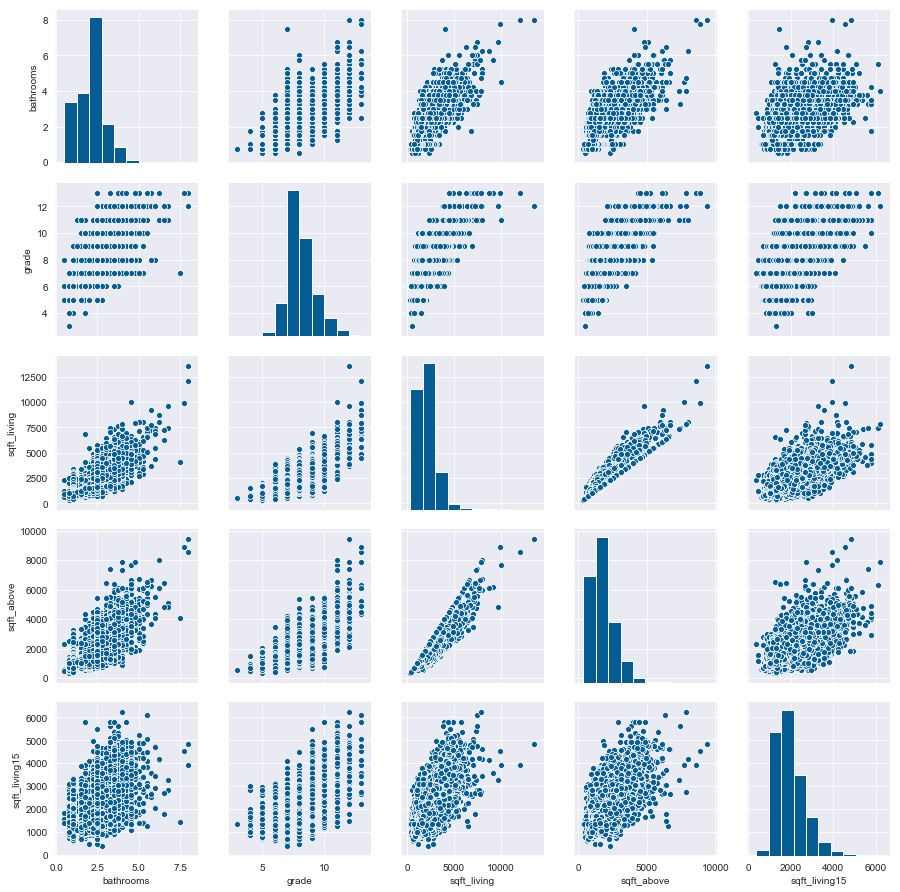

In [27]:
# Clean the data: Check for collinearity
sns.pairplot(df, vars=['bathrooms', 'grade', 'sqft_living', 'sqft_above', 'sqft_living15']);

Let's run a simple, single-variable linear regression. This regression will take the following form:

$$y =  \beta_0+ \beta_1 x $$

I will use the most highly correlated variable to price, sqft_living, to build a model using the ordinary least squares method (OLS) of regression. This method is valuable because while it is relatively inflexible, it is highly interpretable and predictive. 

In [29]:
#import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Linear regression 1: simple, one variable
X = 
Y = 


According to the histogram above, sqft_living does not have a normal distribution -- it is skewed to the right. To obtain a more accurate model, I will log transform the predictor to normalize it before building our model.

In [ ]:
# Linear regression 1: simple, one variable

# replace columns
data_fin = pd.DataFrame([])
data_fin["acc"]= scaled_acc
data_fin["disp"]= scaled_disp
data_fin["horse"] = scaled_horse
data_fin["weight"] = scaled_weight

# replace categorical variables with dummies
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
mpg = data["mpg"]

# concatenate DataFrames
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [ ]:
# Calculate R-squared, OLS
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
data_ols.head(3)

In [ ]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
predictors = predictors.drop("orig_3",axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [ ]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

In [ ]:
# Test model
# train_data, test_data = train_test_split(df, train_size = 0.8, random_state=3)


In [ ]:
# Linear regression 2: multivariate linear regression

# replace columns
data_fin = pd.DataFrame([])
data_fin["acc"]= scaled_acc
data_fin["disp"]= scaled_disp
data_fin["horse"] = scaled_horse
data_fin["weight"] = scaled_weight

# replace categorical variables with dummies
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
mpg = data["mpg"]

# concatenate DataFrames
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [ ]:
# Calculate R-squared, OLS
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis= 1)
data_ols.head(3)

In [ ]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
predictors = predictors.drop("orig_3",axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [ ]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

In [ ]:
# Test model
# train_data, test_data = train_test_split(df, train_size = 0.8, random_state=3)


In [ ]:
# Linear regression 3: log function

# log-transform some variables
acc = data["acceleration"]
logdisp = np.log(data["displacement"])
loghorse = np.log(data["horsepower"])
logweight= np.log(data["weight"])

# scale some variables
scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

# replace columns
data_fin = pd.DataFrame([])
data_fin["acc"]= scaled_acc
data_fin["disp"]= scaled_disp
data_fin["horse"] = scaled_horse
data_fin["weight"] = scaled_weight

# replace categorical variables with dummies
cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
mpg = data["mpg"]

# concatenate DataFrames
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [ ]:
# Test model
# train_data, test_data = train_test_split(df, train_size = 0.8, random_state=3)


In [ ]:
# Compare R-squared values

In [ ]:
# Linear regression 4: Normalize features
# scikit-learn provides automatic tools to scale features, see, among others, MinMaxScaler, StandardScaler and Normalizer. Have a look at these built-in functions and some code examples here: 
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!

In [ ]:
# Visualize non-normal features

In [ ]:
# Test model
# train_data, test_data = train_test_split(df, train_size = 0.8, random_state=3)

> The p-value represents the probability that the coefficient is actually zero.

The p-value, $p<0.05$, denotes that a certain parameter is significant, and $p>0.05$ means that the parameter isn't significant.

This represents a 95% confidence interval. What this means is that, after having run the model, we are 95% certain that our parameter value is within the bounds of this interval.

# Plot Code Template

In [ ]:
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
plt.plot(data, data, label='Sample Data')

# Add labels for x and y axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Add a title for the plot
plt.title('PLOT TITLE')

# Add a legend to the plot with legend()
plt.legend(loc=4)

# Output the final plot
plt.show()

'''Subplot
# Define a new figure with matplotlib's .plot() function. 
new_figure = plt.figure()

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)

# Generate a line plot 
ax.plot([1, 4, 6, 8], [10, 15, 27, 32], color='lightblue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on same axes
ax.scatter([0.5, 2.2, 4.2, 6.5], [21, 19, 9, 26], color='red', marker='o')

# Set the limits of x and y for axes
ax.set_xlim(0, 9), ax.set_ylim(5,35)

# Show the plot
plt.show()
'''



# Subplot loop template

In [ ]:
x = np.linspace(-10, 10, 101)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
plt.title('Graphs of Various Polynomials')
for n in range(1,9):
    row = (n-1)//2
    col = n%2-1
    ax = axes[row][col]
    y = [xi**n for xi in x]
    ax.plot(x,y)
    ax.set_title('x^{}'.format(n))

# Linestyles

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

In [ ]:
def plot_hists(df,nrows=1,ncols=1, figsize=(4,4), columns = None):
    """Plots histograms given a Dataframe, Num Rows, Num Cols and a Size opt. for each subplot. 
    You can pass a List of Columnpostion to slice the Dataframe"""
    df = df.copy()
    fig , axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize[0]*nrows,figsize[1]*ncols))
    for n,c in enumerate(df[[df.columns[x] for x in columns]] if columns else df):
        row = n//ncols
        col = n%ncols
        ax = axes[row][col]
        sns.distplot(df[c],ax=ax);